In [ ]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read data to dataframe
df1 = pd.read_csv('/content/Transactions.csv')
df2 = pd.read_csv('/content/prod_cat_info.csv')

In [ ]:
df1.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [ ]:
df2.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [ ]:
# merubah isi dari kolom yang negatif menjadi positif pada df1
minus = ['Qty','Rate','total_amt']

for i in minus:
  df1[i] = df1[i].abs()

In [ ]:
df1.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,5,772,405.300,4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,5,1497,785.925,8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,2,791,166.110,1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,3,1363,429.345,4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,2,791,166.110,1748.110,TeleShop


In [ ]:
# menyamakan nama kolom subcategory di df1 dengan df2
df2.rename(columns={'prod_sub_cat_code' : 'prod_subcat_code'}, inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [ ]:
# mengubah tipe data prod_subcat_code dan prod_cat_code pada df1 dan df2 menjadi string
# nantinya akan dibuat key baru dengan menggabungkan 2 kolom tersebut
df1['prod_cat_code'] = df1['prod_cat_code'].astype(str)
df1['prod_subcat_code'] = df1['prod_subcat_code'].astype(str)
df2['prod_cat_code'] = df2['prod_cat_code'].astype(str)
df2['prod_subcat_code'] = df2['prod_subcat_code'].astype(str)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  object 
 4   prod_cat_code     23053 non-null  object 
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.8+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   prod_cat_code     23 non-null     object
 1   prod_cat          23 non-null     object
 2   prod_subcat_code  23 non-null     object
 3   prod_subcat       23 non-null     object
dtypes: object(4)
memory usage: 864.0+ bytes


In [ ]:
# membuat key baru untuk lebih unik dan bisa di gabungkan 
df1['prod_id'] = df1['prod_cat_code']+df1['prod_subcat_code']
df2['prod_id'] = df2['prod_cat_code']+df2['prod_subcat_code']

In [ ]:
df1.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_id
0,80712190438,270351,28-02-2014,1,1,5,772,405.300,4265.300,e-Shop,11
1,29258453508,270384,27-02-2014,5,3,5,1497,785.925,8270.925,e-Shop,35


In [ ]:
df2.head(2)

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat,prod_id
0,1,Clothing,4,Mens,14
1,1,Clothing,1,Women,11


In [ ]:
# join data df1 dan df2
df = df1.merge(df2, on='prod_id', how='left', suffixes=['','_'])
df.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_id,prod_cat_code_,prod_cat,prod_subcat_code_,prod_subcat
0,80712190438,270351,28-02-2014,1,1,5,772,405.300,4265.300,e-Shop,11,1,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,5,1497,785.925,8270.925,e-Shop,35,3,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,2,791,166.110,1748.110,TeleShop,56,5,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,3,1363,429.345,4518.345,e-Shop,611,6,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,2,791,166.110,1748.110,TeleShop,56,5,Books,6,DIY


In [ ]:
# merubah tipe data tran_date menjadi datetime
df['tran_date'] = pd.to_datetime(df['tran_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     23053 non-null  int64         
 1   cust_id            23053 non-null  int64         
 2   tran_date          23053 non-null  datetime64[ns]
 3   prod_subcat_code   23053 non-null  object        
 4   prod_cat_code      23053 non-null  object        
 5   Qty                23053 non-null  int64         
 6   Rate               23053 non-null  int64         
 7   Tax                23053 non-null  float64       
 8   total_amt          23053 non-null  float64       
 9   Store_type         23053 non-null  object        
 10  prod_id            23053 non-null  object        
 11  prod_cat_code_     23053 non-null  object        
 12  prod_cat           23053 non-null  object        
 13  prod_subcat_code_  23053 non-null  object        
 14  prod_s

In [ ]:
# melihat store type yang paling sering terjadi transaksi
df['Store_type'].value_counts()

e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64

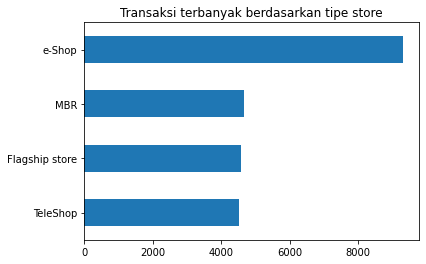

In [ ]:
df['Store_type'].value_counts().sort_values().plot.barh(title='Transaksi terbanyak berdasarkan tipe store')

In [ ]:
# melihat produk kategori yang paling sering terjadi transaksi
df['prod_cat'].value_counts()

Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: prod_cat, dtype: int64

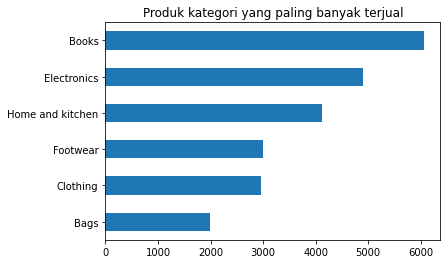

In [ ]:
df['prod_cat'].value_counts().sort_values().plot.barh(title='Produk kategori yang paling banyak terjual')

In [ ]:
# melihat produk sub kategori yang paling sering terjadi transaksi
df[['prod_id', 'prod_cat', 'prod_subcat']].value_counts()

prod_id  prod_cat          prod_subcat        
612      Home and kitchen  Tools                  1062
23       Footwear          Women                  1048
57       Books             Fiction                1043
610      Home and kitchen  Kitchen                1037
511      Books             Children               1035
34       Electronics       Mobiles                1031
53       Books             Comics                 1031
611      Home and kitchen  Bath                   1023
24       Footwear          Kids                   1009
62       Home and kitchen  Furnishing             1007
11       Clothing          Women                  1005
510      Books             Non-Fiction            1004
41       Bags              Mens                   1003
44       Bags              Women                   995
56       Books             DIY                     989
13       Clothing          Kids                    988
39       Electronics       Cameras                 985
38       Electroni

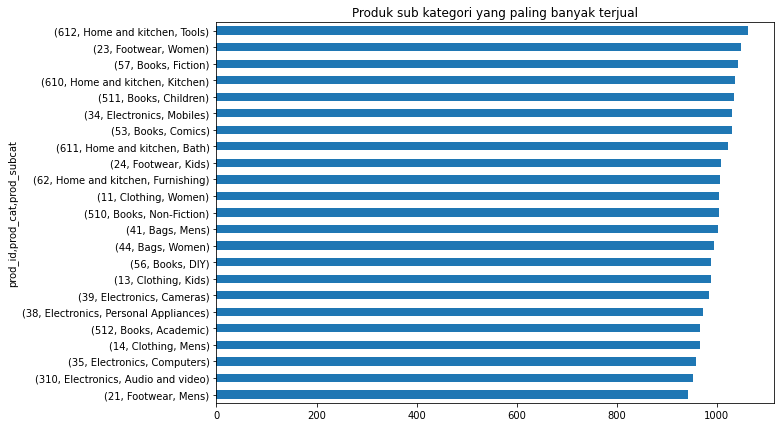

In [ ]:
df[['prod_id', 'prod_cat', 'prod_subcat']].value_counts().sort_values().plot.barh(title='Produk sub kategori yang paling banyak terjual', figsize=(10,7))

In [ ]:
# melihat rata-rata total amount dari setiap store_type
df.groupby('Store_type')['total_amt'].mean().round().sort_values(ascending=False)

Store_type
Flagship store    2643.0
e-Shop            2636.0
MBR               2605.0
TeleShop          2562.0
Name: total_amt, dtype: float64

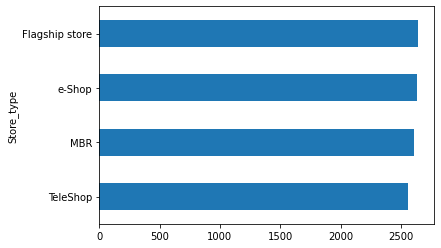

In [ ]:
df.groupby('Store_type')['total_amt'].mean().round().sort_values(ascending=True).plot.barh()

In [ ]:
# produk kategori dengan total amount tertinggi
df.groupby('prod_cat')['total_amt'].sum().round().sort_values(ascending=False)

prod_cat
Books               15946909.0
Electronics         12964489.0
Home and kitchen    10546927.0
Clothing             7897857.0
Footwear             7729465.0
Bags                 5242352.0
Name: total_amt, dtype: float64

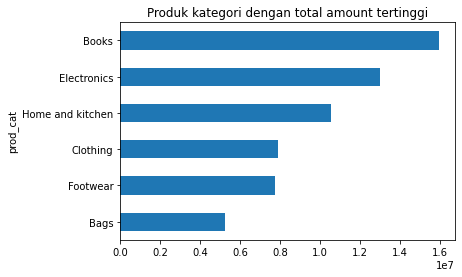

In [ ]:
df.groupby('prod_cat')['total_amt'].sum().round().sort_values(ascending=True).plot.barh(title='Produk kategori dengan total amount tertinggi')

In [ ]:
# menambahkan kolom tahun dan bulan pada df 
df['tahun'] = df['tran_date'].dt.year
df['bulan'] = df['tran_date'].dt.month_name()

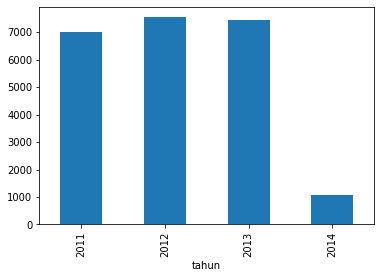

In [ ]:
# jumlah transaksi tiap tahunnya
df.groupby('tahun')['transaction_id'].count().plot.bar()

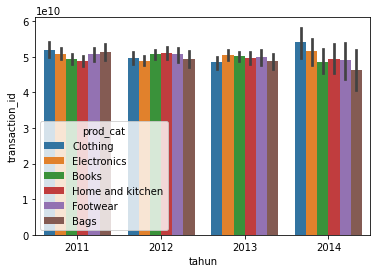

In [ ]:
# pembelian terbanyak setiap tahunnya berdasarkan produk kategori
sns.barplot(data=df, x="tahun", y="transaction_id", hue="prod_cat")

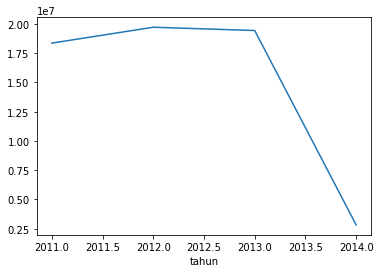

In [ ]:
# total amount setiap tahunnya 
df.groupby('tahun')['total_amt'].sum().plot.line()

In [ ]:
df.groupby('tahun')['total_amt'].sum().round()

tahun
2011    18355401.0
2012    19711508.0
2013    19432298.0
2014     2828791.0
Name: total_amt, dtype: float64

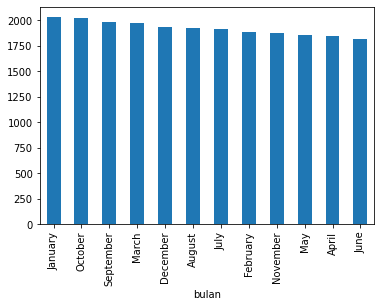

In [ ]:
# jumlah transaksi terbanyak pada setiap bulannya
df.groupby(['bulan'])['transaction_id'].count().sort_values(ascending=False).plot.bar()